In [1]:
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/MyDrive/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

**Рассмотрим возраст заболевших.**

In [5]:
df["AGE"].values, np.min(df["AGE"].values), np.max(df["AGE"].values)

(array([65, 72, 55, ..., 55, 28, 52]), 0, 121)

**Выборочное среднее.**

In [6]:
np.mean(df["AGE"].values)

41.794102472403026

**Выборочная дисперсия.**

In [35]:
np.var(df["AGE"].values)

285.8595369236244

**Выборочный квантиль.**

In [8]:
np.quantile(df["AGE"].values, 0.1), np.quantile(df["AGE"].values, 0.5), np.quantile(df["AGE"].values, 0.7), np.quantile(df["AGE"].values, 0.9), np.quantile(df["AGE"].values, 0.97)

(23.0, 40.0, 50.0, 64.0, 77.0)

**График выборочной функции распределения.**

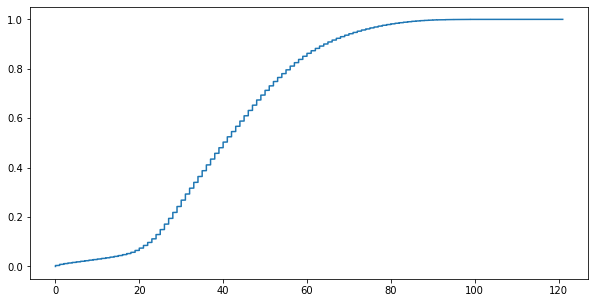

In [9]:
ecdf = ECDF(df["AGE"].values)
plt.plot(ecdf.x, ecdf.y)

**Гистограмма.**

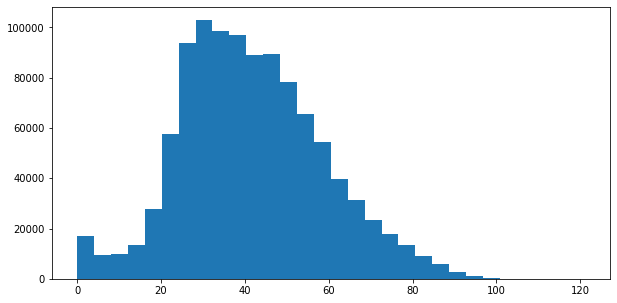

In [10]:
plt.hist(df["AGE"].values, bins=30)
plt.show()

**Ядерная оценка плотности вероятности.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


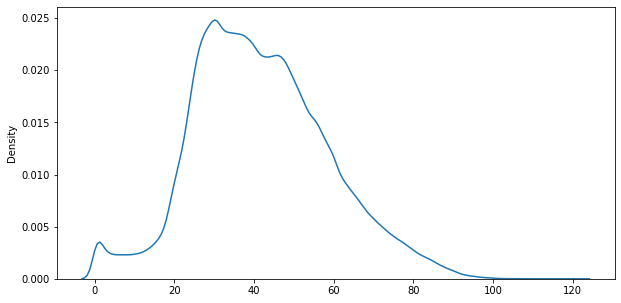

In [11]:
sns.distplot(df["AGE"].values, hist=False)

**Двусторонние доверительные интервалы.**

In [41]:
values = df["AGE"].values

**Для математического ожидания.**

In [45]:
a = 1 - 0.9
n = len(values)
n

1048575

In [49]:
t = stats.t.ppf(1 - a/2, n)

min = np.mean(values) - (np.sqrt(np.var(values)) / np.sqrt(n)) * t
max = np.mean(values) + (np.sqrt(np.var(values)) / np.sqrt(n)) * t

print("Доверительный интервал для 0.9: {} < m ({}) < {}".format(min, np.mean(values), max))

Доверительный интервал для 0.9: 41.76694406906663 < m (41.794102472403026) < 41.82126087573942


In [51]:
a = 1 - 0.95

In [52]:
t = stats.t.ppf(1 - a/2, n)

min = np.mean(values) - (np.sqrt(np.var(values)) / np.sqrt(n)) * t
max = np.mean(values) + (np.sqrt(np.var(values)) / np.sqrt(n)) * t

print("Доверительный интервал для 0.95: {} < m ({}) < {}".format(min, np.mean(values), max))

Доверительный интервал для 0.95: 41.76174123006475 < m (41.794102472403026) < 41.8264637147413


**Для дисперсии.**

In [62]:
a = 1 - 0.9

In [72]:
c1 = stats.chi2.ppf(1 - a/2, n)
c2 = stats.chi2.ppf(a/2, n)

min = np.var(values) * (n - 1) / c1
max = np.var(values) * (n - 1) / c2

print("Доверительный интервал для 0.9: {} < m ({}) < {}".format(min, np.var(values), max))

Доверительный интервал для 0.9: 285.2110538728979 < m (285.8595369236244) < 286.5098051058932


In [73]:
a = 1 - 0.95

In [75]:
c1 = stats.chi2.ppf(1 - a/2, n)
c2 = stats.chi2.ppf(a/2, n)

min = np.var(values) * (n - 1) / c1
max = np.var(values) * (n - 1) / c2

print("Доверительный интервал для 0.95: {} < m ({}) < {}".format(min, np.var(values), max))

Доверительный интервал для 0.95: 285.0870630060347 < m (285.8595369236244) < 286.63462176226193


**Односторонние доверительные интервалы.**

**Для математического ожидания.**

In [77]:
a = 1 - 0.9

In [78]:
t = stats.t.ppf(1 - a, n)

min = np.mean(values) - (np.sqrt(np.var(values)) / np.sqrt(n)) * t
max = np.mean(values) + (np.sqrt(np.var(values)) / np.sqrt(n)) * t

print("Доверительный интервал для 0.9: {} < m ({}) < infinity".format(min, np.mean(values)))
print("Доверительный интервал для 0.9: -infinity < m ({}) < {}".format(np.mean(values), max))

Доверительный интервал для 0.9: 41.7729426044848 < m (41.794102472403026) < infinity
Доверительный интервал для 0.9: -infinity < m (41.794102472403026) < 41.815262340321254


In [82]:
a = 1 - 0.95

In [83]:
t = stats.t.ppf(1 - a, n)

min = np.mean(values) - (np.sqrt(np.var(values)) / np.sqrt(n)) * t
max = np.mean(values) + (np.sqrt(np.var(values)) / np.sqrt(n)) * t

print("Доверительный интервал для 0.95: {} < m ({}) < infinity".format(min, np.mean(values)))
print("Доверительный интервал для 0.95: -infinity < m ({}) < {}".format(np.mean(values), max))

Доверительный интервал для 0.95: 41.76694406906663 < m (41.794102472403026) < infinity
Доверительный интервал для 0.95: -infinity < m (41.794102472403026) < 41.82126087573942


**Для дисперсии.**

In [84]:
a = 1 - 0.9

In [85]:
c1 = stats.chi2.ppf(1 - a, n)
c2 = stats.chi2.ppf(a, n)

min = np.var(values) * (n - 1) / c1
max = np.var(values) * (n - 1) / c2

print("Доверительный интервал для 0.9: {} < m ({}) < infinity".format(min, np.var(values)))
print("Доверительный интервал для 0.9: -infinity < m ({}) < {}".format(np.var(values), max))

Доверительный интервал для 0.9: 285.3540966635374 < m (285.8595369236244) < infinity
Доверительный интервал для 0.9: -infinity < m (285.8595369236244) < 286.365989411814


In [86]:
a = 1 - 0.95

In [87]:
c1 = stats.chi2.ppf(1 - a, n)
c2 = stats.chi2.ppf(a, n)

min = np.var(values) * (n - 1) / c1
max = np.var(values) * (n - 1) / c2

print("Доверительный интервал для 0.95: {} < m ({}) < infinity".format(min, np.var(values)))
print("Доверительный интервал для 0.95: -infinity < m ({}) < {}".format(np.var(values), max))

Доверительный интервал для 0.95: 285.2110538728979 < m (285.8595369236244) < infinity
Доверительный интервал для 0.95: -infinity < m (285.8595369236244) < 286.5098051058932
